**Problem 7:	Demonstrate the working of Logistic Regression. Use an appropriate dataset and evaluate the results.**

In [1]:
# Demonstrate the working of Logistic Regression
# Dataset: Heart Disease Prediction (UCI)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, mean_squared_error
)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Data Science_Lab/heart.csv'
sayem = pd.read_csv(file_path)

In [5]:
print("First 5 Rows of Dataset:")
display(sayem.head())

First 5 Rows of Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
print("\n Dataset Information:")
sayem.info()


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
print("\n Missing Values:")
print(sayem.isnull().sum())


 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Basic Statistics
display(sayem.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/tmp/ipython-input-859154767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=sayem, palette='coolwarm')


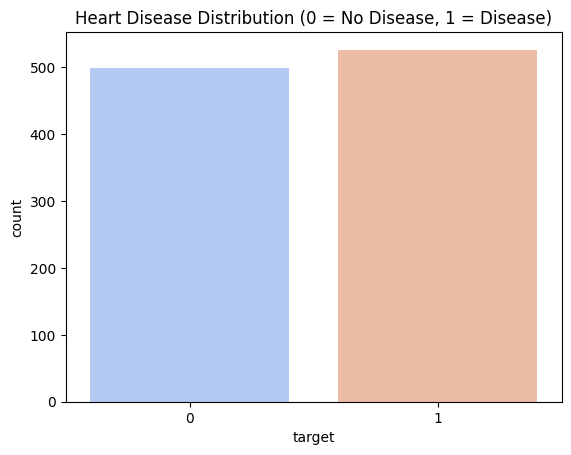

In [9]:
# Check target class distribution
sns.countplot(x='target', data=sayem, palette='coolwarm')
plt.title("Heart Disease Distribution (0 = No Disease, 1 = Disease)")
plt.show()

In [10]:
# Feature and Target Split
X = sayem.drop('target', axis=1)
y = sayem['target']

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
print("\n Logistic Regression model successfully trained!")


 Logistic Regression model successfully trained!


In [14]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [15]:
# MODEL EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy*100:.2f}%")


 Model Accuracy: 78.99%


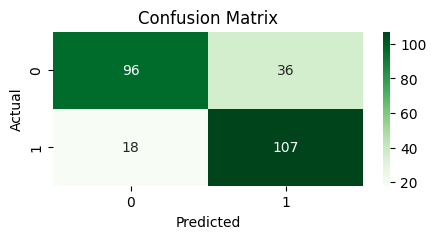

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257



In [18]:
# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

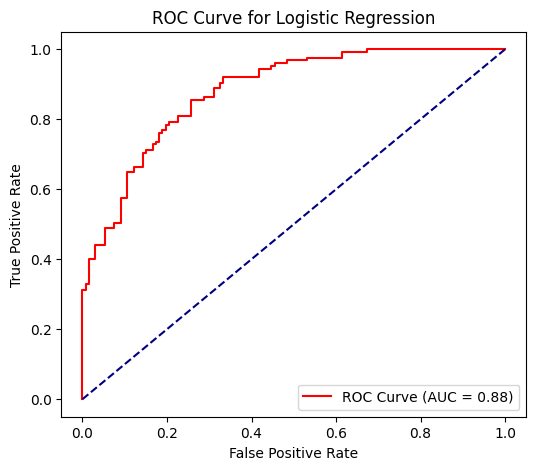

In [19]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

/tmp/ipython-input-849121822.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='Spectral')


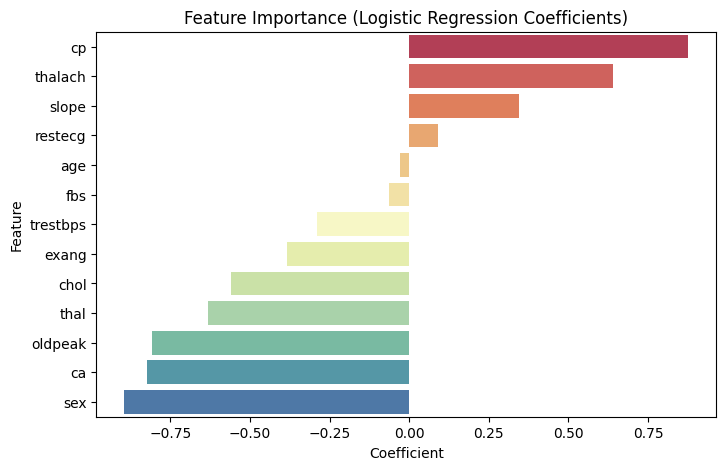

In [20]:
# Feature Importance (Coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='Spectral')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

/tmp/ipython-input-2998499631.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=sayem, palette='coolwarm', ax=axes[0,2])
/tmp/ipython-input-2998499631.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='Spectral', ax=axes[1,0])
/tmp/ipython-input-2998499631.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axes[1,2], palette='cool')


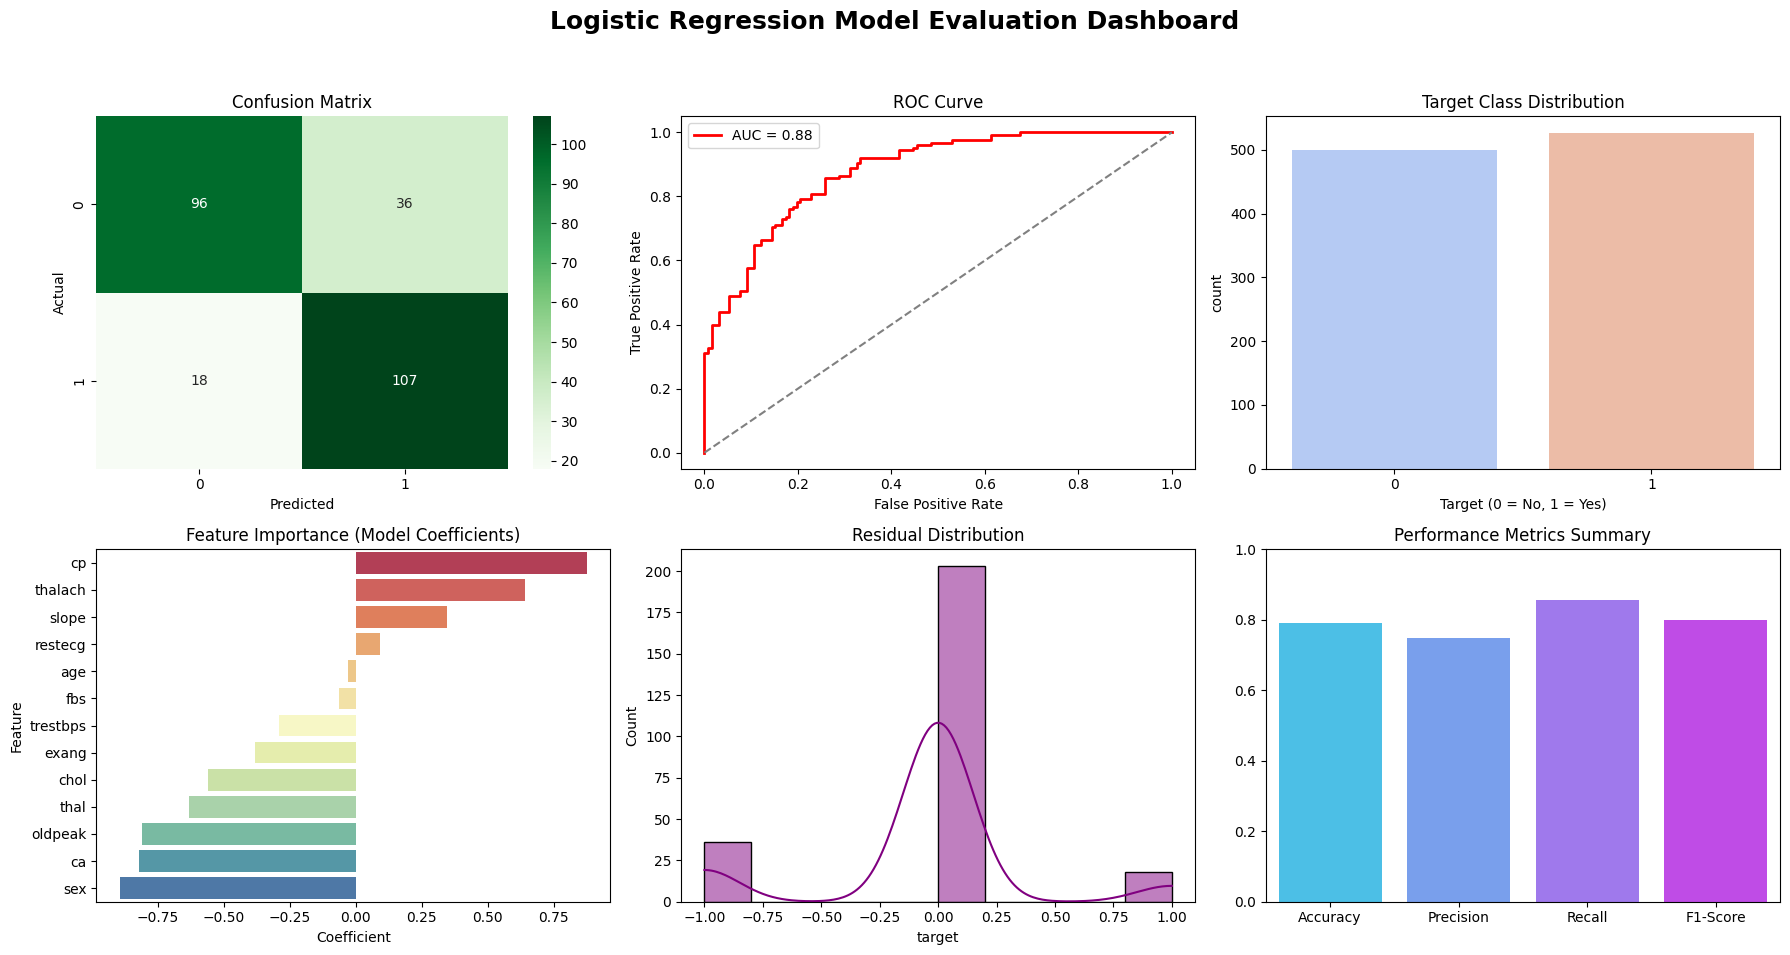

In [24]:
# Dashboard Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Logistic Regression Model Evaluation Dashboard", fontsize=18, fontweight='bold')

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0,0])
axes[0,0].set_title("Confusion Matrix")
axes[0,0].set_xlabel("Predicted")
axes[0,0].set_ylabel("Actual")

# ROC Curve
axes[0,1].plot(fpr, tpr, color='red', lw=2, label=f"AUC = {roc_auc:.2f}")
axes[0,1].plot([0,1], [0,1], linestyle='--', color='gray')
axes[0,1].set_title("ROC Curve")
axes[0,1].set_xlabel("False Positive Rate")
axes[0,1].set_ylabel("True Positive Rate")
axes[0,1].legend()

# Target Distribution
sns.countplot(x='target', data=sayem, palette='coolwarm', ax=axes[0,2])
axes[0,2].set_title("Target Class Distribution")
axes[0,2].set_xlabel("Target (0 = No, 1 = Yes)")

# Feature Importance
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='Spectral', ax=axes[1,0])
axes[1,0].set_title("Feature Importance (Model Coefficients)")

# Residual Histogram (difference between prediction and truth)
residuals = y_test - y_pred
sns.histplot(residuals, bins=10, kde=True, color='purple', ax=axes[1,1])
axes[1,1].set_title("Residual Distribution")

# Accuracy Summary Bar Chart
metrics = {
    'Accuracy': accuracy,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score']
}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axes[1,2], palette='cool')
axes[1,2].set_title("Performance Metrics Summary")
axes[1,2].set_ylim(0, 1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
# Summary
print(f"""
MODEL SUMMARY
Model Used: Logistic Regression
Accuracy: {accuracy*100:.2f}%
AUC Score: {roc_auc:.2f}
Major Evaluation Metrics:
   - Precision: {metrics['Precision']:.2f}
   - Recall: {metrics['Recall']:.2f}
   - F1-Score: {metrics['F1-Score']:.2f}

  The model effectively predicts heart disease presence.
  Important features: Chest Pain Type, Max Heart Rate, Cholesterol.
""")


MODEL SUMMARY
Model Used: Logistic Regression
Accuracy: 78.99%
AUC Score: 0.88
Major Evaluation Metrics:
   - Precision: 0.75
   - Recall: 0.86
   - F1-Score: 0.80

  The model effectively predicts heart disease presence.
  Important features: Chest Pain Type, Max Heart Rate, Cholesterol.

